In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import tokenize
import pandas as pd
import numpy as np
import afinn
import re
from scipy import stats

In [2]:
Dep = pd.read_csv('Depression_origin.csv')
ADHD = pd.read_csv('ADHD_origin.csv')
bipolar = pd.read_csv('bipolar_origin.csv')
anxiety = pd.read_csv('anxiety_origin.csv')
schizo = pd.read_csv('schizo_origin.csv')
nonM = pd.read_csv('non_mh_origin.csv')
nonM

,Unnamed: 0,subreddit,title,author,text_context,date,content
0,0,relationships,WOULD IT BE WRONG FOR ME (24/F) TO DATE MY MOM...,k3ndallee1,"Hey everyone, this may be all over the place.....",2019-09-23 10:59:35,WOULD IT BE WRONG FOR ME (24/F) TO DATE MY MOM...
1,1,relationships,I can't get over my bfs cheating accusation,kittkatt739,"I'm (18,F) and I've been with my bf (20,M) for...",2019-09-23 11:03:11,I can't get over my bfs cheating accusation I'...
2,2,relationships,I don't know how to explain to my parents that...,LadyFreyNerd,I'm a 24 year old girl and I'm having the hard...,2019-09-23 11:08:53,I don't know how to explain to my parents that...
3,3,relationships,Should I (23F) propose to my boyfriend (28M) o...,unweiner,I'll try to kept this short :---)) My boyfrien...,2019-09-23 11:09:10,Should I (23F) propose to my boyfriend (28M) o...
4,4,relationships,My (18f) brother (16m) is beginning to go off ...,pazza6,A bit of backstory: My brother and i used to b...,2019-09-23 11:13:17,My (18f) brother (16m) is beginning to go off ...
...,...,...,...,...,...,...,...
425336,425341,jokes,An insane asylum builds a swimming pool for it...,perkinsmadafaka,All of them seemed to enjoy it and had fun swi...,2020-09-23 23:54:49,An insane asylum builds a swimming pool for it...
425337,425342,jokes,"Detective: ""we caught him handing out free stu...",theearlofcrankcase,"Chief: ""so that's how you knew?""\n\nDetective:...",2020-09-23 23:55:28,"Detective: ""we caught him handing out free stu..."
425338,425343,jokes,What's the difference between black and white?,Avocadorable2003,3 inches,2020-09-23 23:56:33,What's the difference between black and white?...
425339,425344,jokes,My friend asked me for one good reason why he ...,yours_nottruly,I told him 13 reasons why.,2020-09-23 23:58:58,My friend asked me for one good reason why he ...


In [3]:
del Dep['Unnamed: 0']
del schizo['Unnamed: 0']
del anxiety['Unnamed: 0']
del bipolar['Unnamed: 0']
del ADHD['Unnamed: 0']
del nonM['Unnamed: 0']
nonM['subreddit'] = 'nonM'

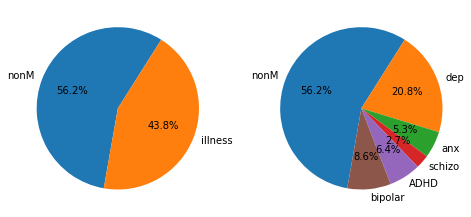

In [162]:
import matplotlib.pyplot as plt
fig,(ax1,ax2) = plt.subplots(1,2,figsize = plt.figaspect(0.5))
ratio = [len(nonM), len(Dep)+len(anxiety)+len(schizo)+len(ADHD)+len(bipolar)]
labels = ['nonM', 'illness']
ax1.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
ratio = [len(nonM), len(Dep), len(anxiety), len(schizo),len(ADHD),len(bipolar)]
labels = ['nonM', 'dep', 'anx', 'schizo','ADHD','bipolar']
ax2.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
                                         
plt.show()

In [4]:
def s_cleansing(List):
    
    corpus = []
    for i in List:
        url_pattern ='https?://\S+|#([0-9a-zA-Z]*)'
        i = re.sub(pattern=url_pattern, repl=' ', string = str(i))
        i = i.replace('\r','').replace('\n','')
        text = re.sub('[-=+,#/\?:^$”@*\"“※~&%ㆍ!』\\‘|\(\)\[\]\<\>`…》;’]', '', i.lower())
        corpus.append(text)
    return corpus

In [10]:
dep = s_cleansing(Dep['content'].tolist())
adhd = s_cleansing(ADHD['content'].tolist())
bi = s_cleansing(bipolar['content'].tolist())
anx = s_cleansing(anxiety['content'].tolist())
sch = s_cleansing(schizo['content'].tolist())
non = s_cleansing(nonM['content'].tolist())

In [11]:
import time
start = time.time()
sid = SentimentIntensityAnalyzer()

dep_word = []
adhd_word = []
bi_word = []
anx_word = []
sch_word = []

for i in dep:
    num = sid.polarity_scores(i)['compound']
    dep_word.append(num)
print('dep ok')
    
for i in adhd:
    num = sid.polarity_scores(i)['compound']
    adhd_word.append(num)

print('adhd ok')
for i in bi:
    num = sid.polarity_scores(i)['compound']
    bi_word.append(num)

print('bi ok')

for i in anx:
    num = sid.polarity_scores(i)['compound']
    anx_word.append(num)

print('anx ok')

for i in sch:
    num = sid.polarity_scores(i)['compound']
    sch_word.append(num)
print('sch ok')
    

print(time.time()-start)

dep ok
adhd ok
bi ok
anx ok
sch ok
348.16203784942627


In [181]:
dep_mean = [len(word_tokenize(i)) for i in dep]
adhd_mean = [len(word_tokenize(i)) for i in adhd]
bi_mean = [len(word_tokenize(i) for i in bi)]
anx_mean = [len(word_tokenize(i) for i in anx)]


KeyboardInterrupt: 

['i', 'am', 'boy']

In [12]:
nonM_word = []
for i in non:
    num = sid.polarity_scores(i)['compound']
    nonM_word.append(num)

In [39]:
Dep['vader'] = dep_word
schizo['vader'] = sch_word
anxiety['vader'] = anx_word
ADHD['vader'] = adhd_word
bipolar['vader'] = bi_word
nonM['vader'] = nonM_word

# 정상군과 질환군 전체 분포 비교

In [45]:
illness_word = dep_word + sch_word + anx_word + bi_word + adhd_word
illness = pd.concat([Dep,ADHD,bipolar,anxiety,schizo])

In [30]:
bins = np.arange(-1,1.1,0.1)
bins

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00])

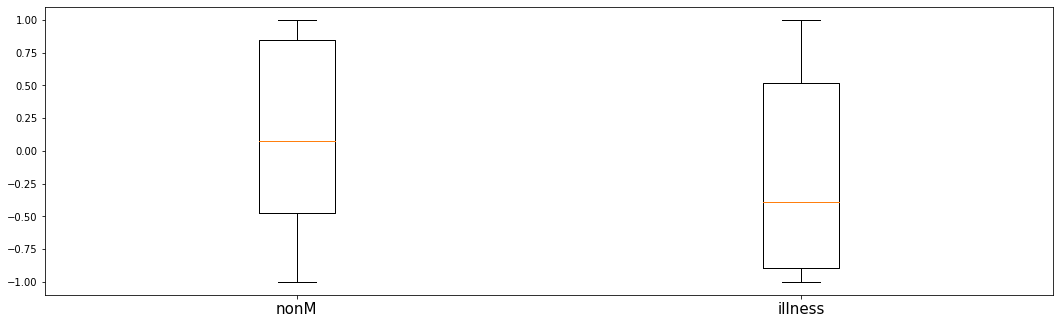

In [70]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot((nonM_word,illness_word))
ax.set_xticklabels(['nonM', 'illness'],fontsize=15)
plt.show()

Text(0, 0.5, 'Distribution')

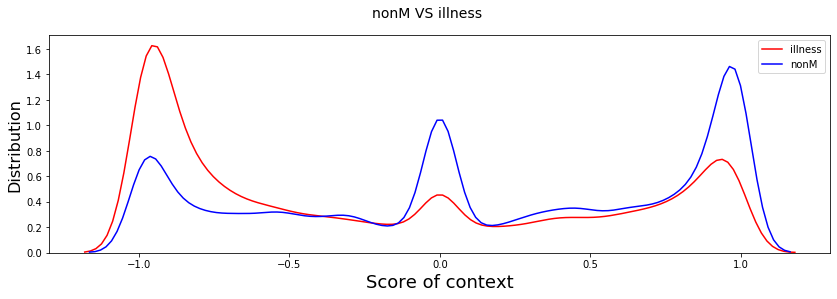

In [71]:
fig = sns.kdeplot(illness_word, color='red',clip=(-1,1), label = 'illness')
fig = sns.kdeplot(nonM_word, color='blue',clip=(-1,1), label = 'nonM')
fig.figure.suptitle("nonM VS illness", fontsize = 14)
plt.xlabel('Score of context', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

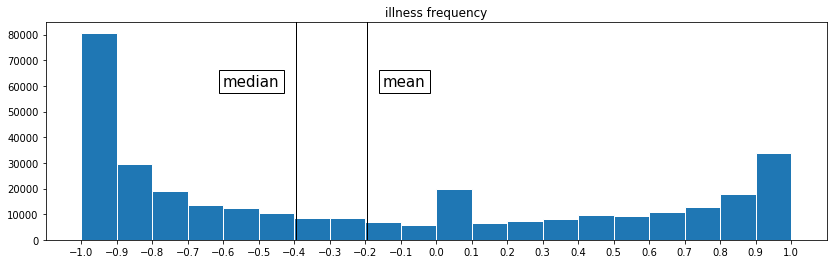

In [115]:
plt.hist(illness_word,bins,ec='w',alpha = 1)
plt.xticks(bins)
plt.axvline(x = np.median(illness_word),color = 'black',lw=1)
plt.text(-0.6,60000,"median",bbox={"facecolor":"white"},fontsize=15)
plt.axvline(x = np.mean(illness_word),color = 'black',lw=1)
plt.text(-0.15,60000,"mean",bbox={"facecolor":"white"},fontsize=15)
plt.title('illness frequency')
plt.show()

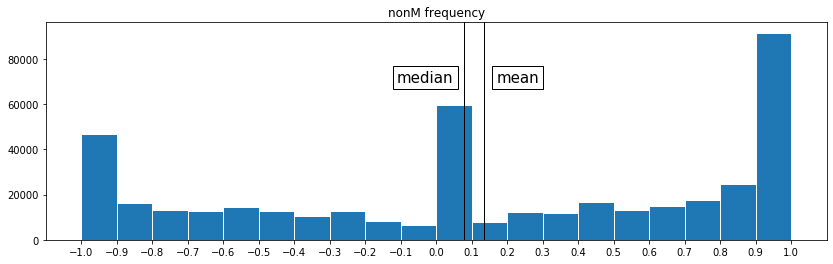

In [119]:
plt.hist(nonM_word,bins,ec='w',alpha = 1)
plt.xticks(bins)
plt.title('nonM frequency')
plt.axvline(x = np.median(nonM_word),color = 'black',lw=1)
plt.text(-0.11,70000,"median",bbox={"facecolor":"white"},fontsize=15)
plt.axvline(x = np.mean(nonM_word),color = 'black',lw=1)
plt.text(0.17,70000,"mean",bbox={"facecolor":"white"},fontsize=15)
plt.show()

In [54]:
pd.DataFrame({'illness':illness['vader'].describe(),'nonM':nonM['vader'].describe()})

,illness,nonM
count,331592.000000,425341.000000
mean,-0.193487,0.134914
std,0.717014,0.687113
min,-1.000000,-1.000000
25%,-0.894700,-0.476700
50%,-0.394100,0.077200
75%,0.519800,0.847400
max,1.000000,1.000000


In [184]:
stats.shapiro(nonM_word),stats.shapiro(illness_word)

/Users/leesangyun/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


((0.9032579064369202, 0.0), (0.8629788756370544, 0.0))

In [183]:
stats.bartlett(nonM_word,illness_word)

BartlettResult(statistic=678.3528889174278, pvalue=1.5244603227550283e-149)

정규성 검정 결과와 등분산성 검정을 시도한 결과 정규분포를 따르지 않는다는 결론을 내릴 수 있고 이에 따라 비모수적 통계기법을 사용하여 검정을 해야한다.

In [55]:
res = stats.mannwhitneyu(nonM.vader,illness.vader)
res

MannwhitneyuResult(statistic=51389387304.0, pvalue=0.0)

맨 휘트니 검정 결과 평균에 대한 검정을 할 수는 없지만 중위수는 다르다라는 결론을 낼 수 있다.

중심 극한정리를 적용하여 정규성을 따른다고 가정하고 t통계를 시행하도록 하여 평균이 동일한지 여부를 보도록 한다.

In [120]:
stats.ttest_ind(nonM.vader,illness.vader,equal_var=False)

Ttest_indResult(statistic=201.33989290057866, pvalue=0.0)

두 분포의 평균이 서로 다르다는 결론이 나온다. 이어서 위 table에서 계산된 평균값이 의미가 있는지 t통계를 사용하여 확인해본다.

In [150]:
# nonM의 감정수치 평균에 대한 검정
result1 = stats.ttest_1samp(nonM['vader'], np.mean(nonM['vader'])) 
# illness의 감정수치 평균에 대한 검정
result2 = stats.ttest_1samp(illness['vader'],np.mean(illness['vader']))
result1,result2

(Ttest_1sampResult(statistic=1.2144838705584485e-11, pvalue=0.9999999999903098),
 Ttest_1sampResult(statistic=1.0877890635832536e-11, pvalue=0.9999999999913207))

nonM과 illness 각각의 평균값에 대한 99퍼센트 신뢰구간에 해당하는 구간이다.

In [154]:
a = nonM['vader']
nonM_mean = stats.t.interval(0.99, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
a = illness['vader']
illness_mean = stats.t.interval(0.99, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
nonM_mean,illness_mean

((0.13220065004746925, 0.13762825758191313),
 (-0.1966938863599357, -0.19027920708022258))

# 정상군과 각 질환별 분포

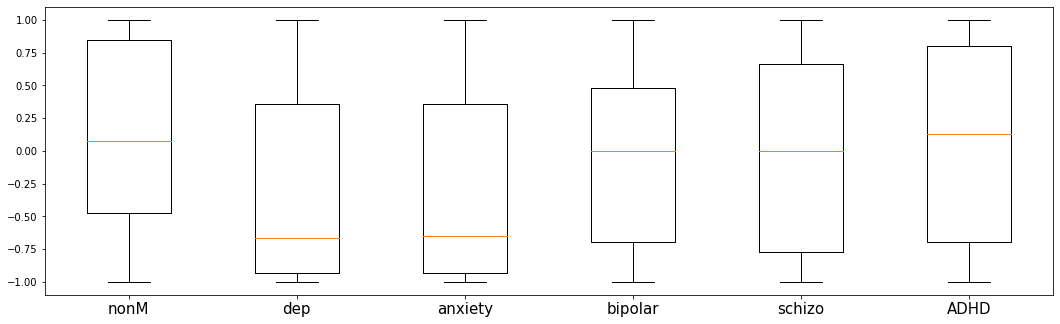

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot((nonM_word,dep_word,anx_word,bi_word,sch_word,adhd_word))
ax.set_xticklabels(['nonM', 'dep', 'anxiety','bipolar','schizo','ADHD'],fontsize=15)
plt.show()

Text(0, 0.5, 'Distribution')

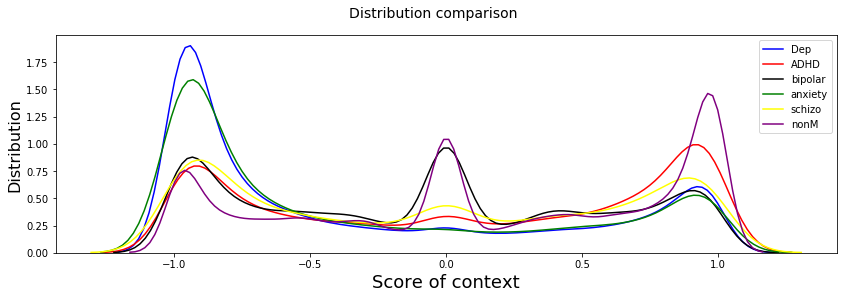

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = sns.kdeplot(dep_word, color='blue', clip=(-1,1),label = 'Dep')
fig = sns.kdeplot(adhd_word, color='red', clip=(-1,1),label = 'ADHD')
fig = sns.kdeplot(bi_word, color='black', clip=(-1,1),label = 'bipolar')
fig = sns.kdeplot(anx_word, color='green',clip=(-1,1),label = 'anxiety')
fig = sns.kdeplot(sch_word, color='yellow',clip=(-1,1), label = 'schizo')
fig = sns.kdeplot(nonM_word, color='purple',clip=(-1,1), label = 'nonM')
fig.figure.suptitle("Distribution comparison", fontsize = 14)
plt.xlabel('Score of context', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

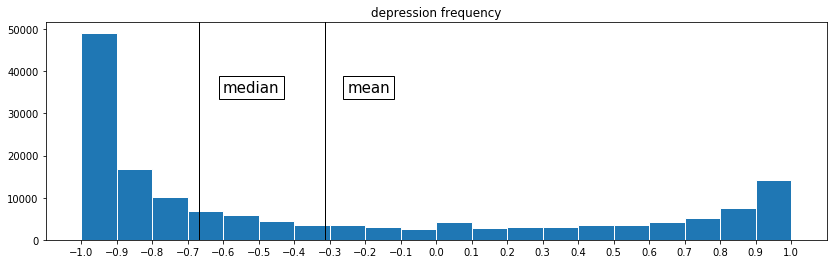

In [123]:
plt.rcParams["figure.figsize"] = (14,4)
plt.hist(dep_word,bins,ec='w',alpha = 1)
plt.title('depression frequency')
plt.xticks(bins)
plt.axvline(x = np.median(dep_word),color = 'black',lw=1)
plt.text(-0.6,35000,"median",bbox={"facecolor":"white"},fontsize=15)
plt.axvline(x = np.mean(dep_word),color = 'black',lw=1)
plt.text(-0.25,35000,"mean",bbox={"facecolor":"white"},fontsize=15)
plt.show()

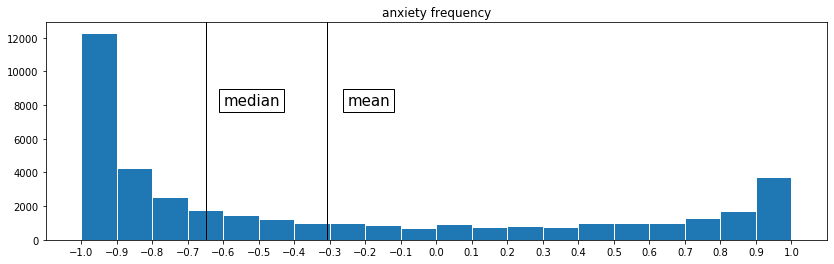

In [125]:
plt.rcParams["figure.figsize"] = (14,4)
plt.hist(anx_word,bins,ec='w',alpha = 1)
plt.title('anxiety frequency')
plt.xticks(bins)
plt.axvline(x = np.median(anx_word),color = 'black',lw=1)
plt.text(-0.6,8000,"median",bbox={"facecolor":"white"},fontsize=15)
plt.axvline(x = np.mean(anx_word),color = 'black',lw=1)
plt.text(-0.25,8000,"mean",bbox={"facecolor":"white"},fontsize=15)
plt.show()

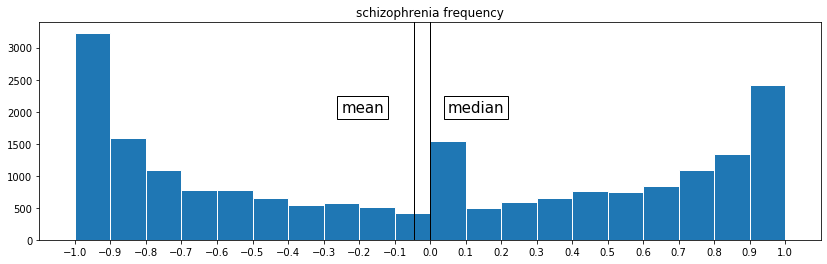

In [129]:
plt.rcParams["figure.figsize"] = (14,4)
plt.hist(sch_word,bins,ec='w',alpha = 1)
plt.title('schizophrenia frequency')
plt.xticks(bins)
plt.axvline(x = np.median(sch_word),color = 'black',lw=1)
plt.text(0.05,2000,"median",bbox={"facecolor":"white"},fontsize=15)
plt.axvline(x = np.mean(sch_word),color = 'black',lw=1)
plt.text(-0.25,2000,"mean",bbox={"facecolor":"white"},fontsize=15)
plt.show()

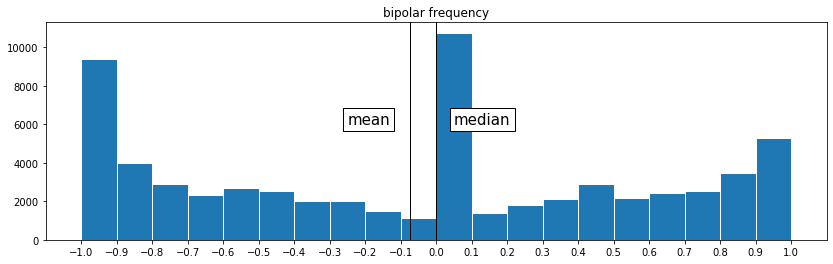

In [138]:
plt.rcParams["figure.figsize"] = (14,4)
plt.hist(bi_word,bins,ec='w',alpha = 1)
plt.title('bipolar frequency')
plt.xticks(bins)
plt.axvline(x = np.median(bi_word),color = 'black',lw=1)
plt.text(0.05,6000,"median",bbox={"facecolor":"white"},fontsize=15)
plt.axvline(x = np.mean(bi_word),color = 'black',lw=1)
plt.text(-0.25,6000,"mean",bbox={"facecolor":"white"},fontsize=15)
plt.show()

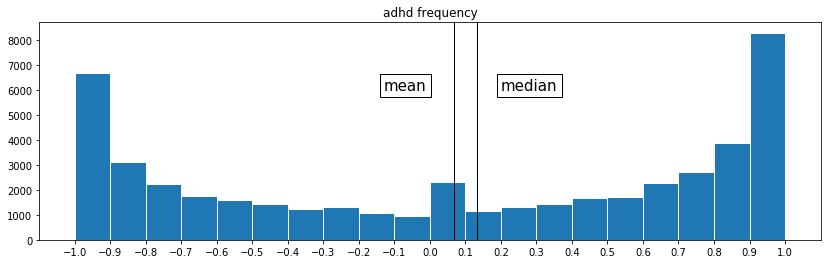

In [144]:
plt.rcParams["figure.figsize"] = (14,4)
plt.hist(adhd_word,bins,ec='w',alpha = 1)
plt.title('adhd frequency')
plt.xticks(bins)
plt.axvline(x = np.median(adhd_word),color = 'black',lw=1)
plt.text(0.2,6000,"median",bbox={"facecolor":"white"},fontsize=15)
plt.axvline(x = np.mean(adhd_word),color = 'black',lw=1)
plt.text(-0.13,6000,"mean",bbox={"facecolor":"white"},fontsize=15)
plt.show()

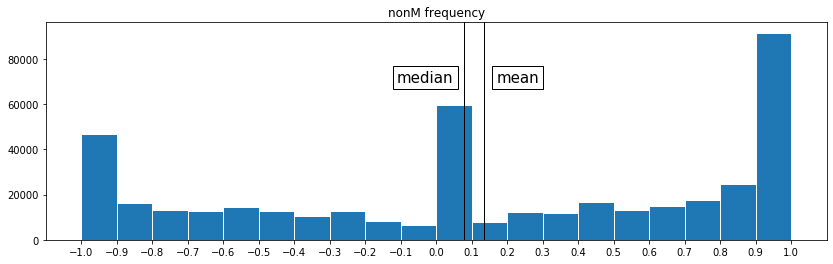

In [145]:
plt.hist(nonM_word,bins,ec='w',alpha = 1)
plt.xticks(bins)
plt.title('nonM frequency')
plt.axvline(x = np.median(nonM_word),color = 'black',lw=1)
plt.text(-0.11,70000,"median",bbox={"facecolor":"white"},fontsize=15)
plt.axvline(x = np.mean(nonM_word),color = 'black',lw=1)
plt.text(0.17,70000,"mean",bbox={"facecolor":"white"},fontsize=15)
plt.show()

In [43]:
pd.DataFrame({'dep':Dep['vader'].describe(),
              'schizo':schizo['vader'].describe(),
              'anxiety':anxiety['vader'].describe(),
              'adhd':ADHD['vader'].describe(),
              'bipolar':bipolar['vader'].describe(),
              'nonM':nonM['vader'].describe()})

,dep,schizo,anxiety,adhd,bipolar,nonM
count,157213.000000,20614.000000,40158.000000,48147.000000,65460.000000,425341.000000
mean,-0.313383,-0.043982,-0.308340,0.066426,-0.073325,0.134914
std,0.714023,0.702964,0.710732,0.725306,0.643135,0.687113
min,-1.000000,-0.999900,-1.000000,-1.000000,-0.999900,-1.000000
25%,-0.934900,-0.771700,-0.931300,-0.697150,-0.696425,-0.476700
50%,-0.667500,0.000000,-0.648600,0.131700,0.000000,0.077200
75%,0.361200,0.659700,0.361200,0.803950,0.482300,0.847400
max,1.000000,0.999600,0.999700,0.999900,0.999900,1.000000


모수적 검정 사용 가능 여부 판단을 위해 정규성 검정과 등분산성 검정을 진행한다.

In [63]:
print(stats.shapiro(dep_word))
print(stats.shapiro(bi_word))
print(stats.shapiro(adhd_word))
print(stats.shapiro(sch_word))
print(stats.shapiro(anx_word))

(0.8165766000747681, 0.0)
(0.9279989004135132, 0.0)
(0.8781788349151611, 0.0)
(0.89531010389328, 0.0)
(0.8218576312065125, 0.0)


In [146]:
stats.bartlett(dep_word,bi_word,adhd_word,sch_word,anx_word)

BartlettResult(statistic=1156.2386618107087, pvalue=4.883517721655282e-249)

정규성 검정 결과 정규분포를 따르지 않고 분포들의 분산도 서로 다르다라는 결론이 나오므로 비모수적 검정을 시행해야 한다.

In [62]:
from scipy import stats
res = stats.kruskal(nonM_word,dep_word,anx_word,sch_word,adhd_word,bi_word)
res

KruskalResult(statistic=55635.68163729842, pvalue=0.0)

nonM과 각 질환의 중위수가 모두 서로 같다는 귀무가설을 기각하므로 하나 이상의 그룹의 중위수가 서로 다르다는 결론이 나온다.

In [64]:
vader_list = [nonM_word,dep_word,anx_word,bi_word,adhd_word,sch_word]
for i in range(len(vader_list)-1):
    for j in range(i+1,len(vader_list)):
        print(stats.mannwhitneyu(vader_list[i],vader_list[j]))

MannwhitneyuResult(statistic=21304670541.0, pvalue=0.0)
MannwhitneyuResult(statistic=5482834314.0, pvalue=0.0)
MannwhitneyuResult(statistic=11332675814.0, pvalue=0.0)
MannwhitneyuResult(statistic=9571949859.0, pvalue=2.0796425362762183e-122)
MannwhitneyuResult(statistic=3697256776.0, pvalue=0.0)
MannwhitneyuResult(statistic=3127679527.5, pvalue=0.002214273480109243)
MannwhitneyuResult(statistic=3985442860.0, pvalue=0.0)
MannwhitneyuResult(statistic=2634506208.0, pvalue=0.0)
MannwhitneyuResult(statistic=1245762610.0, pvalue=0.0)
MannwhitneyuResult(statistic=1025819692.5, pvalue=0.0)
MannwhitneyuResult(statistic=678582831.0, pvalue=0.0)
MannwhitneyuResult(statistic=320828048.0, pvalue=0.0)
MannwhitneyuResult(statistic=1383040187.0, pvalue=1.8479743915091232e-273)
MannwhitneyuResult(statistic=658118216.5, pvalue=4.812328776155077e-08)
MannwhitneyuResult(statistic=449994044.0, pvalue=4.0775101558609432e-84)


정상군과 질병군 5개를 각각 맨휘트니 검정 결과 모두 귀무가설을 기각, 모든 분포는 서로 다른 중위수를 가진다.

In [147]:
for i in range(len(vader_list)-1):
    for j in range(i+1,len(vader_list)):
        print(stats.ttest_ind(vader_list[i],vader_list[j],equal_var = False))

Ttest_indResult(statistic=214.87067467704173, pvalue=0.0)
Ttest_indResult(statistic=119.8038757853686, pvalue=0.0)
Ttest_indResult(statistic=76.40253638298574, pvalue=0.0)
Ttest_indResult(statistic=19.740990717820786, pvalue=1.83855232352249e-86)
Ttest_indResult(statistic=35.72077446389963, pvalue=6.875593777879141e-272)
Ttest_indResult(statistic=-1.267837198109581, pvalue=0.20486082049952778)
Ttest_indResult(statistic=-77.6337480183277, pvalue=0.0)
Ttest_indResult(statistic=-100.90041695249738, pvalue=0.0)
Ttest_indResult(statistic=-51.641241263259936, pvalue=0.0)
Ttest_indResult(statistic=-54.06214636476686, pvalue=0.0)
Ttest_indResult(statistic=-77.30004364177366, pvalue=0.0)
Ttest_indResult(statistic=-43.72651450668108, pvalue=0.0)
Ttest_indResult(statistic=-33.653121164550534, pvalue=7.69592639434271e-247)
Ttest_indResult(statistic=-5.331591713985507, pvalue=9.80104474411382e-08)
Ttest_indResult(statistic=18.689576604660125, pvalue=1.2873536159837336e-77)


중심 극한 정리를 가정하고 6개 집단을 각각 t검정을 통해 평균이 같은지에 대한 여부를 알아보았다. 그 결과 유일하게 depression과 anxiety의 평균값 동일 검정에서 p-value가 0.2 이상을 나타내면서 두 분포의 평균값이 동일하다라는 것 외에는 모든 분포는 평균값이 다르다는 결론이 나왔다.  
depression과 anxiety를 구분지을 때 두 분포는 평균값으로는 차이를 나타내지 못한다는 것이다.

In [157]:
for a in vader_list:
    mean = stats.t.interval(0.99, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
    print(mean)

(0.13220065004748205, 0.13762825758192593)
(-0.31802209635082784, -0.30874482750406956)
(-0.31747647483787617, -0.2992044156447176)
(-0.07980049662051752, -0.06685038025085432)
(0.05791155031098218, 0.07494102201958876)
(-0.05659470731000492, -0.031369239522245004)


6개 집단의 평균의 99% 신뢰구간은 위와 같은 구간을 가지게 된다.